<a href="https://colab.research.google.com/github/Achala-Nahar/Travel-agent-using-langgraph/blob/main/TravelagentLANGGRAPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain langchain_core langchain_groq langchain_community langchain langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Suc

In [ ]:
import os
from typing import TypedDict,Annotated,List
from langgraph.graph import StateGraph,END
from langchain_core.messages import HumanMessage,AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display,Image

## ***define agent***

In [ ]:
class PlannerState(TypedDict):
  messages: Annotated[List[HumanMessage | AIMessage],'messages in the conversation']
  city: str
  interests:List[str]
  itinerary: str


In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
llm=ChatGroq(temperature=0,groq_api_key=groq_api_key,model_name='llama-3.3-70b-versatile')

In [ ]:
result=llm.invoke('what is a multi AI agent')

In [ ]:
result

AIMessage(content='A multi-AI agent system, also known as a multi-agent system (MAS), is a collection of multiple artificial intelligence (AI) agents that interact and cooperate with each other to achieve a common goal or set of goals. Each AI agent in the system is a separate entity with its own capabilities, knowledge, and objectives, but they work together to solve complex problems or accomplish tasks that would be difficult or impossible for a single agent to achieve alone.\n\nIn a multi-AI agent system, each agent can be designed to perform a specific function or task, such as:\n\n1. **Perception**: gathering and processing data from the environment\n2. **Reasoning**: making decisions and drawing conclusions based on the data\n3. **Action**: taking actions to achieve a goal or objective\n4. **Communication**: exchanging information with other agents\n\nThe key characteristics of a multi-AI agent system are:\n\n1. **Autonomy**: each agent operates independently and makes its own de

In [ ]:
result.content

'A multi-AI agent system, also known as a multi-agent system (MAS), is a collection of multiple artificial intelligence (AI) agents that interact and cooperate with each other to achieve a common goal or set of goals. Each AI agent in the system is a separate entity with its own capabilities, knowledge, and objectives, but they work together to solve complex problems or accomplish tasks that would be difficult or impossible for a single agent to achieve alone.\n\nIn a multi-AI agent system, each agent can be designed to perform a specific function or task, such as:\n\n1. **Perception**: gathering and processing data from the environment\n2. **Reasoning**: making decisions and drawing conclusions based on the data\n3. **Action**: taking actions to achieve a goal or objective\n4. **Communication**: exchanging information with other agents\n\nThe key characteristics of a multi-AI agent system are:\n\n1. **Autonomy**: each agent operates independently and makes its own decisions\n2. **Dist

In [ ]:
itinerary_prompt=ChatPromptTemplate.from_messages([
    ('system',"you are a helpful travel assistant. Create a day trip itinerary for{city} based on user's {interests}.Provide a brief bulleted itinerary"),
    ('human','Create an itinerary for my day trip')

])

In [ ]:
def input_city(state: PlannerState)->PlannerState:
  print("Please enter the city you would like to visit: ")
  user_msg=input("Your input: ")
  return{
      **state,
      'city': user_msg,
      'messages': state['messages']+[HumanMessage(content=user_msg)]
  }

In [ ]:
def input_interests(state:PlannerState)->PlannerState:
  print(f"Please enter your interests for the trip to {state['city']}(comma separated values)")
  user_msg=input("Your input:")

  return{
      **state,
      'interests': [interest.strip() for interest in user_msg.split(",")],
      'messages': state['messages']+ [HumanMessage(content=user_msg)]
  }

In [ ]:
def create_itinerary(state:PlannerState)->PlannerState:
  print(f"Creating an itinerary for {state['city']} based on interests:{','.join(state['interests'])}")
  response=llm.invoke(itinerary_prompt.format_messages(city=state['city'],interests= ','.join(state['interests'])))
  print('\nFinal Itinerary: ')
  print(response.content)
  return{
      **state,
      'messages': state['messages']+[AIMessage(content=response.content)],
      'itinerary':  response.content
  }

**Create and compile the graph:**

In [ ]:
workflow=StateGraph(PlannerState)
workflow.add_node("input_city",input_city)
workflow.add_node('input_interest',input_interests)
workflow.add_node('create_itinerary',create_itinerary)

workflow.set_entry_point('input_city')
workflow.add_edge('input_city','input_interest')
workflow.add_edge('input_interest','create_itinerary')
workflow.add_edge('create_itinerary',END)

app=workflow.compile()

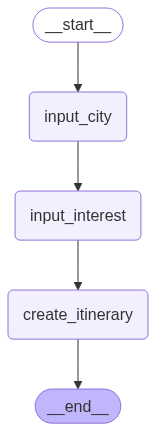

In [ ]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [ ]:
def travel_planner(city: str, interests_str: str):
    print(f"City: {city}, Interests: {interests_str}\n")

    state = {
        'messages': [HumanMessage(content=f"City: {city}, Interests: {interests_str}")],
        'city': city,
        'interests': [i.strip() for i in interests_str.split(",")],
        'itinerary': '',
    }

    state = create_itinerary(state)
    return state["itinerary"]



In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
interface = gr.Interface(
    fn=travel_planner,
    theme='Yntec/HaleyCH_Theme_Orange_Green',
    inputs=[
        gr.Textbox(label="Enter the city for your day trip"),
        gr.Textbox(label="Enter your interests (comma-separated)"),
    ],
    outputs=gr.Textbox(label="Generated Itinerary"),
    title="Travel Itinerary Planner",
    description="Enter a city and your interests to generate a personalized day trip itinerary."
)



In [ ]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://afebcb3b8e9cf2566e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
